In [1]:
#Upload VLE dataset
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'OUData/studentVle.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


In [2]:
#Let's aggregate the sum_click to get total daily clicks and also ignore different types of sites
# List of columns to group by. This should include all columns except 'sum_click' and 'id_site'
columns_to_group_by = ['code_module', 'code_presentation', 'id_student','date'] 

# Group by the specified columns and sum the 'sum_click' for each group
df_grouped = df.groupby(columns_to_group_by).agg(total_daily_clicks=('sum_click', 'sum')).reset_index()
df_grouped.head(100)

,code_module,code_presentation,id_student,date,total_daily_clicks
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3
...,...,...,...,...,...
95,AAA,2013J,28400,150,3
96,AAA,2013J,28400,154,27
97,AAA,2013J,28400,155,1
98,AAA,2013J,28400,156,25


In [3]:
import numpy as np
#create function that returns df with all dates included and 0 for total_daily_clicks for missing dates
def complete_df(code_module,code_presentation,id_student):
    #filter by course, presentation, and student
    filtered_df = df_grouped[(df_grouped['code_module']==code_module) & (df_grouped['code_presentation']==code_presentation) & (df_grouped['id_student']==id_student)]

    #For missing dates, we will make total_daily_clicks to be 0
  
    # Step 1: Find min and max date values
    min_day = filtered_df['date'].min()
    max_day = filtered_df['date'].max()

    # Step 2: Generate complete range of days
    all_days = np.arange(min_day, max_day + 1)  # +1 to include the last day

    # Step 3: Create a DataFrame with all days
    df_all_days = pd.DataFrame({'date': all_days, 'code_module': code_module, 'code_presentation': code_presentation, 'id_student': id_student})
    df_all_days = df_all_days.assign(total_daily_clicks=0)

    # Merge to update total_daily_clicks where data exists
    df_complete = pd.merge(df_all_days, filtered_df[['date', 'total_daily_clicks']], on='date', how='left', suffixes=('', '_update'))
    df_complete['total_daily_clicks'] = df_complete['total_daily_clicks_update'].fillna(df_complete['total_daily_clicks'])
    df_complete.drop(columns='total_daily_clicks_update', inplace=True)

    return df_complete

In [4]:
# The different modules are ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']
#For AAA, the presentations are 2013J and 2014J.
#For BBB, the presentations are 2013B, 2013J, 2014B, 2014J
#For CCC, the presentations are 2014B, 2014J
#For DDD, the presentations are 2013B, 2013J, 2014B, 2014J
#For EEE, the presentations are 2013J, 2014B, 2014J
#For FFF, the presentations are 2013B, 2013J, 2014B, 2014J
#For GGG, the presentations are 2013J, 2014B, 2014J

In [5]:
#Load StudentInfo dataset that has the outcomes of each student for a given module and presentation
file_path = 'OUData/studentInfo.csv'
df_student_info = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df_student_info.head())

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

In [6]:
#There are 383 students total with 258 Pass, 20 Distinction, 60 Withdrawn, 45 Fail
df_aaa_2013j = df_student_info[(df_student_info['code_module']=='AAA' )& (df_student_info['code_presentation']=='2013J')]
print(df_aaa_2013j.shape)
print(df_aaa_2013j[df_aaa_2013j['final_result']=='Pass'].shape)
print(df_aaa_2013j[df_aaa_2013j['final_result']=='Distinction'].shape)
print(df_aaa_2013j[df_aaa_2013j['final_result']=='Withdrawn'].shape)
print(df_aaa_2013j[df_aaa_2013j['final_result']=='Fail'].shape)

(383, 12)
(258, 12)
(20, 12)
(60, 12)
(45, 12)


In [7]:
df_aaa_2013j_withdrawn = df_aaa_2013j[df_aaa_2013j['final_result']=='Withdrawn']
df_aaa_2013j_fail = df_aaa_2013j[df_aaa_2013j['final_result']=='Fail']
df_aaa_2013j_pass = df_aaa_2013j[df_aaa_2013j['final_result']=='Pass']
df_aaa_2013j_distinction = df_aaa_2013j[df_aaa_2013j['final_result']=='Distinction']


Skipping student ID 292923 due to no data.
Skipping student ID 405961 due to no data.
Skipping student ID 2318055 due to no data.
Skipping student ID 2324976 due to no data.
Skipping student ID 2365101 due to no data.


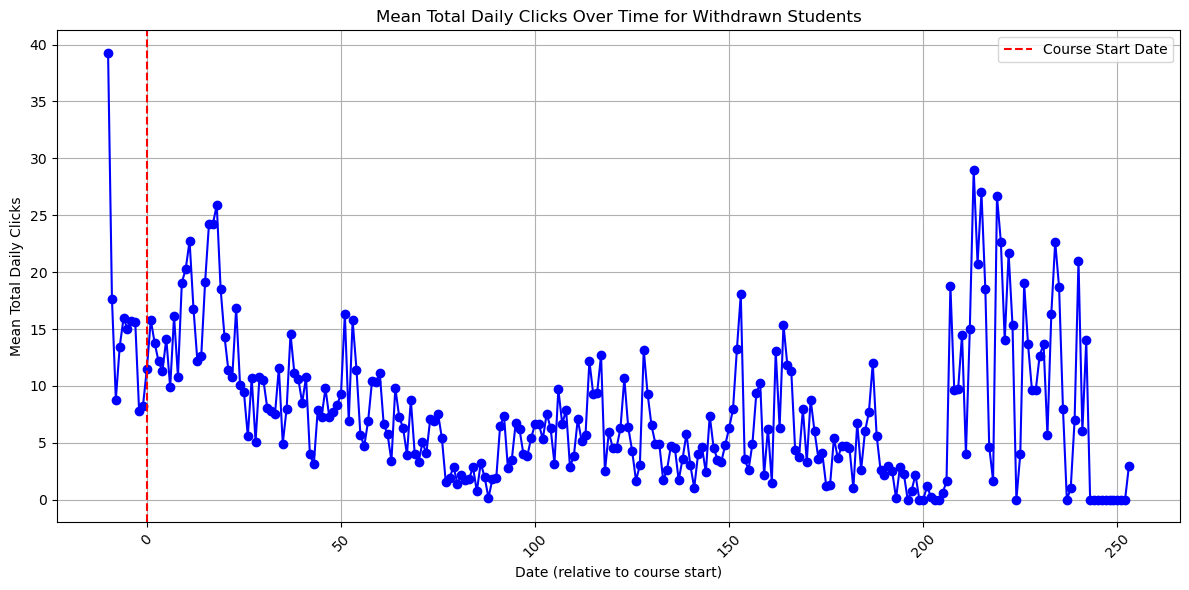

In [8]:

# Unique list of student IDs
unique_student_ids = df_aaa_2013j_withdrawn['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped[(df_grouped['code_module']=='AAA') & (df_grouped['code_presentation']=='2013J')]
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df('AAA', '2013J', student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)

# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['date'], aggregated_df['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Withdrawn Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

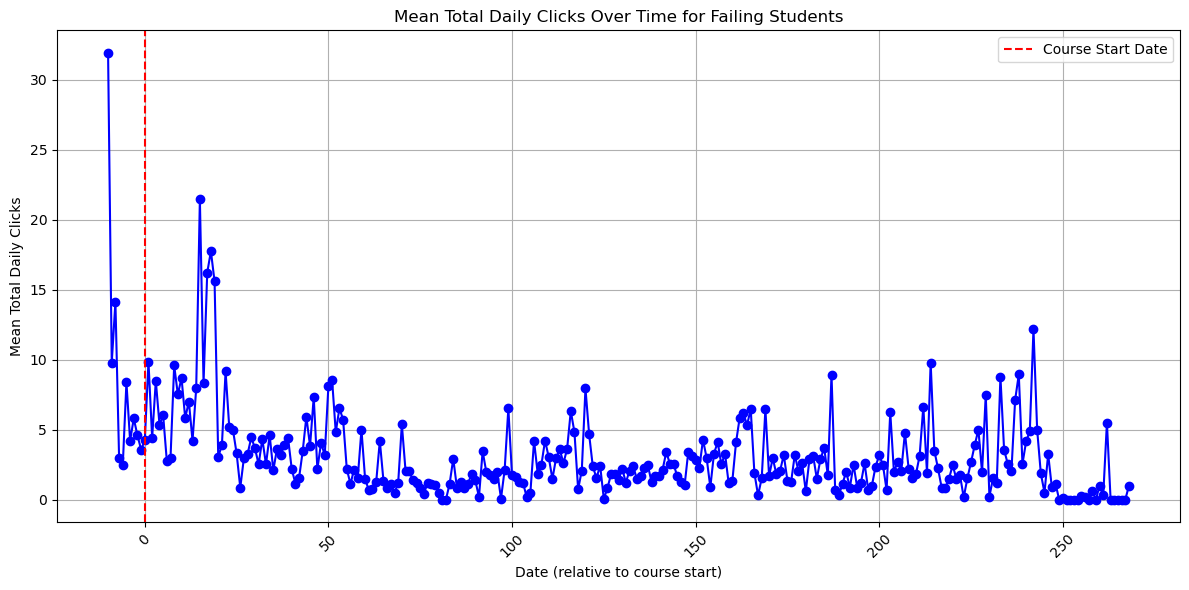

In [9]:
# Unique list of student IDs
unique_student_ids = df_aaa_2013j_fail['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped[(df_grouped['code_module']=='AAA') & (df_grouped['code_presentation']=='2013J')]
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df('AAA', '2013J', student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)
# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['date'], aggregated_df['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Failing Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


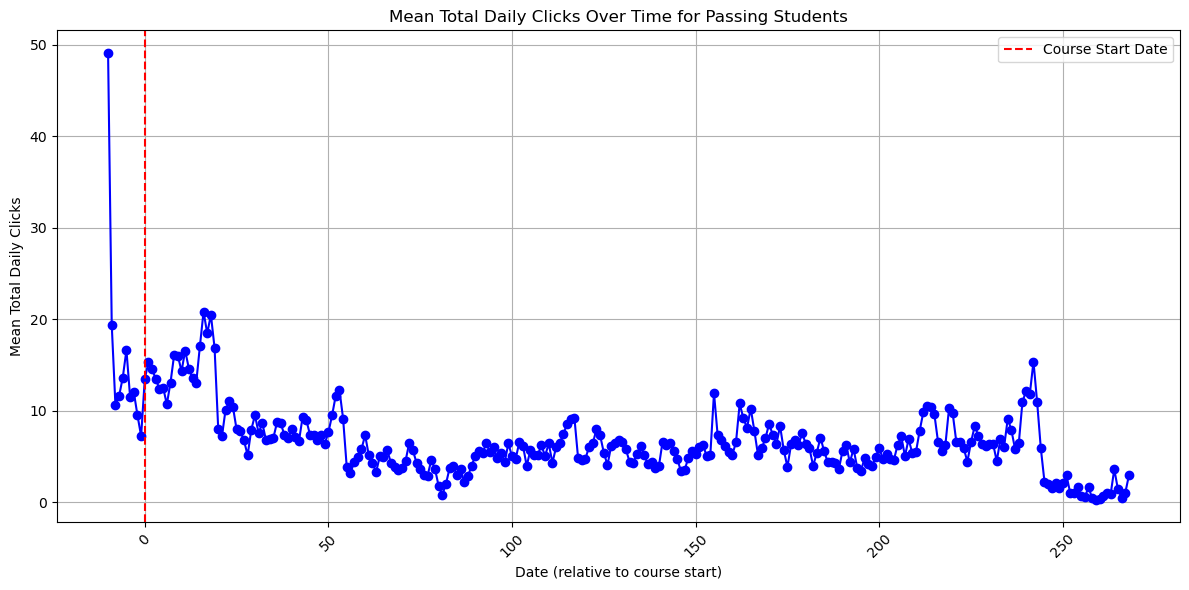

In [10]:
# Unique list of student IDs
unique_student_ids = df_aaa_2013j_pass['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped[(df_grouped['code_module']=='AAA') & (df_grouped['code_presentation']=='2013J')]
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df('AAA', '2013J', student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)
# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['date'], aggregated_df['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Passing Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


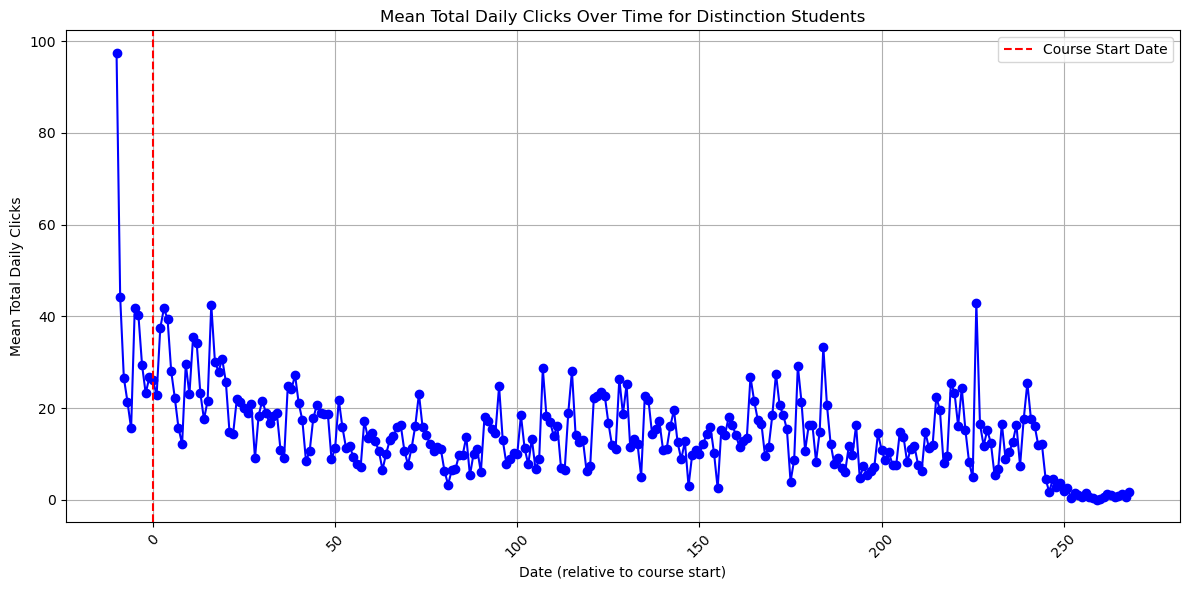

In [11]:
# Unique list of student IDs
unique_student_ids = df_aaa_2013j_distinction['id_student'].unique()
# Initialize an empty DataFrame for combining data
combined_df = pd.DataFrame()

# Loop through each student ID
for student_id in unique_student_ids:
    # Check if the DataFrame is empty
    df=df_grouped[(df_grouped['code_module']=='AAA') & (df_grouped['code_presentation']=='2013J')]
    if df[df['id_student']==student_id].empty:
        print(f"Skipping student ID {student_id} due to no data.")
        continue  # Skip the rest of the loop for this student ID
    # Assuming complete_df returns a DataFrame for the given student ID
    df_student = complete_df('AAA', '2013J', student_id)
    
    # Combine the current student's data with the aggregated DataFrame
    combined_df = pd.concat([combined_df, df_student], ignore_index=True)
# Group by 'date' and calculate mean 'total_daily_clicks'
aggregated_df = combined_df.groupby('date')['total_daily_clicks'].mean().reset_index()
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['date'], aggregated_df['total_daily_clicks'], marker='o', linestyle='-', color='blue')

# Adding plot title and labels
plt.title('Mean Total Daily Clicks Over Time for Distinction Students')
plt.xlabel('Date (relative to course start)')
plt.ylabel('Mean Total Daily Clicks')

# Adding a vertical line to indicate the course start date (if date=0 is the start)
plt.axvline(x=0, color='red', linestyle='--', label='Course Start Date')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
